## Knots with bridges between antipode nodes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

Let's see the roots of the unit circle:

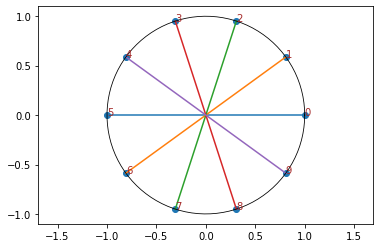

In [2]:
n = 10

#Nodes
r = np.linspace(0, (2*np.pi - 2*np.pi/n), n)
plt.scatter(np.cos(r), np.sin(r))
for j in range(n):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (n//2 + i)] for i in range(n//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

Let's try first with Lissajous knots:

In [248]:
def Lissajous(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)      #Knot
    r = np.linspace(0, 2*np.pi, n+1) #Nodes
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz)
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz)

    #Indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()

In [4]:
Lissajous(10,3,5,1,0.1,0.7)

In [5]:
Lissajous(100,3,5,1,0.1,0.7)

So, first thing we find is that there must be a 2 in one of the frequencies in order to avoid the intersection at the center

In [6]:
Lissajous(10,2,3,5)

In [7]:
Lissajous(500,2,3,5)

## Nodes out of phase & random nodes

But then we find that we can take nodes out of phase in order to avoid the intersection at the center, so we don't need a 2 in one of the frequencies

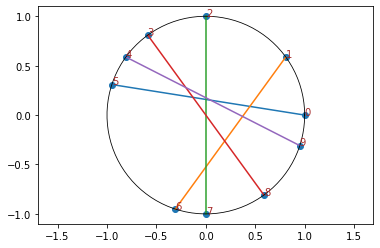

In [240]:
n = 10

#Nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n), n)
# r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.1, n)
r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) )
plt.scatter(np.cos(r), np.sin(r))
for j in range(len(r)):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (len(r)//2 + i)] for i in range(len(r)//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');

In [128]:
import random

In [171]:
random.sample( range(10), 5)

[1, 8, 0, 2, 3]

In [196]:
np.sort( np.array( random.sample( range(10), 5) )*(2*np.pi/10) )

array([0.        , 0.62831853, 1.88495559, 2.51327412, 4.39822972])

In [210]:
n = 10
np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) )

array([0.        , 0.9424778 , 1.57079633, 1.88495559, 3.45575192,
       3.76991118, 4.39822972, 5.02654825, 5.34070751, 5.65486678])

In [241]:
def Lissajous_(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)      #Knot
#     r = np.linspace(0, 2*np.pi, n+1) #Nodes evenly distributed
#     r = np.linspace(0, (2*np.pi - 2*np.pi/n) - 0.01, n) #Nodes out of phase
    r = np.sort( np.array( random.sample( range(2*n), n) )*(2*np.pi/(2*n)) )
    print(r)
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz)
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz)
    
    #Indexes for antipodes
    lines = [[i, i + len(r)//2] for i in range(len(r)//2) ]

    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()
    
    #Circle
    plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
    plt.yticks(np.linspace(-1,1,5))
    plt.axis('equal')
    plt.show()

In [245]:
np.linspace(0, (2*np.pi - 2*np.pi/10), 10)

array([0.        , 0.62831853, 1.25663706, 1.88495559, 2.51327412,
       3.14159265, 3.76991118, 4.39822972, 5.02654825, 5.65486678])

[0.62831853 0.9424778  1.25663706 1.88495559 2.19911486 2.82743339
 3.14159265 4.08407045 5.34070751 5.96902604]


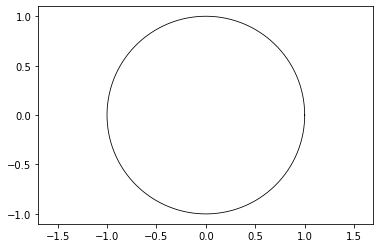

In [246]:
Lissajous_(10,3,5,1,0.1,0.7)

In [251]:
Lissajous(10,2,3,5)

[0.31415927 0.62831853 1.25663706 1.57079633 1.88495559 2.19911486
 2.51327412 2.82743339 5.34070751 5.65486678]


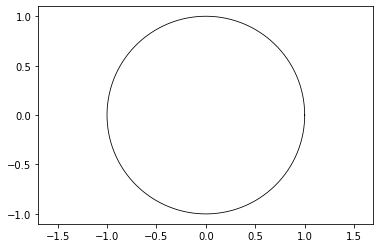

In [250]:
Lissajous_(10,2,3,5)

In [104]:
Lissajous_(10,11,5,7,0,np.pi/4,np.pi/12)

In [113]:
def Lissajous_thick(n,nx,ny,nz,φx=1,φy=1,φz=1,tf=2*np.pi):
    t = np.linspace(0, tf, 500)      #Knot
#     r = np.linspace(0, 2*np.pi, n+1) #Nodes evenly distributed
    r = np.arange(0, 2*np.pi, 3/n+0.1) #Nodes out of phase
    x,y,z = np.cos(nx*t + φx), np.cos(ny*t + φy), np.cos(nz*t + φz)
    a,b,c = np.cos(nx*r + φx), np.cos(ny*r + φy), np.cos(nz*r + φz)

    #Indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=30, color='brown'))]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=30)))

    fig = go.Figure(data=knot)
    fig.show()

In [120]:
Lissajous_thick(12,2,3,5)

## We now try with random knots

**Fourier model**. Consider a smooth emmbedding of $S^{1}$ into $R^{3}$. Denote the coordinate functions by $x(t)$, $y(t)$, and $z(t)$. These smooth coordinate functions may be approximated by fourier series. Conversely we can generate coordinate functions that determine a knot, and choosing the Fourier coefficients randomly gives a model of random knots that are already smoothly embedded. In this context a Fourier $(i,j,k)-$knot is defined by the coorinates functions:

\begin{align}
x(t) = &\ A_{x,1}\cos(n_{x,1}t + \phi_{x,1}) + \cdots + A_{x,i} \cos(n_{x,i}t + \phi_{x,i}) \\
y(t) = &\ A_{y,1}\cos(n_{y,1}t + \phi_{y,1})\ + \cdots + A_{y,j} \cos(n_{y,j}t + \phi_{y,j}) \\
z(t) = &\ A_{z,1}\cos(n_{z,1}t + \phi_{z,1})\ + \cdots + A_{z,k} \cos(n_{z,k}t + \phi_{z,k}) \\
\end{align}

In [93]:
import plotly.express as px

def coefs(i,j,k,m=10): #m is the maximum random integer
    Cx = [[x for x in np.random.randint(0,m,3)] for ix in range(i)] #Ax, nx, ϕx
    Cy = [[x for x in np.random.randint(0,m,3)] for jy in range(j)] #Ay, ny, ϕy
    Cz = [[x for x in np.random.randint(0,m,3)] for kz in range(k)] #Az, nz, ϕz
    return Cx,Cy,Cz
    
def Fourier_knot(ts, cs):
    pts = []
    for t in ts:
        pts.append( sum([ c[0]*np.cos( c[1]*t + c[2] ) for c in cs ] ) )
    return pts

def random_knots(n,i,j,k,m=10,p=10): #n is the number of nodes
    
    #Knot
    C = coefs(i,j,k,m)
    t = np.linspace(0,p,1000)
    x = Fourier_knot(t, C[0])
    y = Fourier_knot(t, C[1])
    z = Fourier_knot(t, C[2])
    knot = [go.Scatter3d(x=x, y=y, z=z, mode='lines', line=dict(width=3, color='brown'))]
    
    #Nodes
#     r = np.linspace(0, 2*np.pi, n+1)   #nodes evenly distributed
    r = np.arange(0, 6*np.pi, 3/n + 0.1) #nodes out of phase
    a = Fourier_knot(r, C[0])
    b = Fourier_knot(r, C[1])
    c = Fourier_knot(r, C[2])
    
    #Array of indexes for antipodes
    lines = [[i, i + n//2] for i in range(n//2) ]

    #Bridges between antipodes
    for l in lines:
        knot.append(go.Scatter3d(x=[ a[l[0]], a[l[1]] ],
                                 y=[ b[l[0]], b[l[1]] ],
                                 z=[ c[l[0]], c[l[1]] ], line=dict(width=3)))

    fig = go.Figure(data=knot)
    fig.show()

#     fig = px.line_3d(x=x, y=y, z=z)
#     fig.show()

In [41]:
random_knots(8,1,1,1,20)

In [46]:
random_knots(20,1,2,3,20)

In [45]:
random_knots(10,1,2,3,20)

In [49]:
random_knots(100,1,2,3)

In [51]:
random_knots(300,1,2,3)

In [61]:
random_knots(300,1,2,3)

In [101]:
random_knots(158,1,2,3)

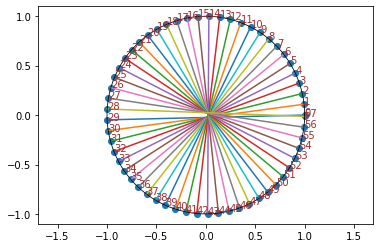

In [106]:
n = 300

#Nodes
# r = np.linspace(0, (2*np.pi - 2*np.pi/n), n)
r = np.arange(0, 2*np.pi, 3/n+0.1)
plt.scatter(np.cos(r), np.sin(r))
for j in range(len(r)):
    plt.text(np.cos(r)[j], np.sin(r)[j], j, c='brown')

lines = [[i, (len(r)//2 + i)] for i in range(len(r)//2) ]
x = []
for i in lines:
    plt.plot(np.cos(r)[i],np.sin(r)[i])
    
#Circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), 'k', lw=0.8)
plt.yticks(np.linspace(-1,1,5))
plt.axis('equal');